In [1]:
pip install kaggle -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
df = pd.read_csv("top_10000_1950-now.csv")
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,Fader,spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,spotify:album:0V59MMtgoruvEqMv18KAOH,Conditions (Tour Edition),spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,2009,https://i.scdn.co/image/ab67616d0000b273f86ae8...,...,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,NaN,Liberation Records,"C 2010 Liberation Music, P 2010 Liberation Music"
1,spotify:track:0NpvdCO506uO58D4AbKzki,Sherry,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,spotify:album:0NUEQILaBzavnzcMEs4buZ,The Very Best of Frankie Valli & The 4 Seasons,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,2003-01-14,https://i.scdn.co/image/ab67616d0000b273b96c21...,...,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,NaN,Rhino,C © 2004 Bob Gaudio & Frankie Valli d/b/a The ...
2,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,I Took A Pill In Ibiza - Seeb Remix,"spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...","Mike Posner, Seeb",spotify:album:1Tz3Ai1guEFf4hV3d9i17K,"At Night, Alone.",spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Mike Posner,2016-05-06,https://i.scdn.co/image/ab67616d0000b273a19be7...,...,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,NaN,"Monster Mountain, LLC / Island","C © 2016 Island Records, a division of UMG Rec..."
3,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Let Go for Tonight,spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,spotify:album:5AQ7uKRSpAv7SNUl4j24ru,Glorious (Deluxe),spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,2014-05-12,https://i.scdn.co/image/ab67616d0000b273ae5c7d...,...,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,NaN,Sign Of The Times Records,P (P) 2014 Sign Of The Times Limited under exc...
4,spotify:track:7KdcZQ3GJeGdserhK61kfv,The Way I Want To Touch You,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,spotify:album:3GUxesVyOehInaxJyCTh6d,Love Will Keep Us Together,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,1975-01-01,https://i.scdn.co/image/ab67616d0000b273e21a28...,...,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,NaN,A&M,"C © 1975 A&M Records, P This Compilation ℗ 197..."


In [5]:
df.shape

(10000, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             10000 non-null  object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9998 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9998 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9998 non-null   object 
 7   Album Artist Name(s)  9998 non-null   object 
 8   Album Release Date    9998 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           10000 non-null  int64  
 11  Track Number          10000 non-null  int64  
 12  Track Duration (ms)   10000 non-null  int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              10000 non-null  bool   
 15  Popularity          

In [7]:
df.isnull().sum()

Track URI                   0
Track Name                  2
Artist URI(s)               2
Artist Name(s)              2
Album URI                   2
Album Name                  2
Album Artist URI(s)         2
Album Artist Name(s)        2
Album Release Date          2
Album Image URL             4
Disc Number                 0
Track Number                0
Track Duration (ms)         0
Track Preview URL          63
Explicit                    0
Popularity                  0
ISRC                        4
Added By                    0
Added At                    0
Artist Genres             551
Danceability                5
Energy                      5
Key                         5
Loudness                    5
Mode                        5
Speechiness                 5
Acousticness                5
Instrumentalness            5
Liveness                    5
Valence                     5
Tempo                       5
Time Signature              5
Album Genres            10000
Label     

In [8]:
df.drop('Album Genres', axis=1, inplace=True)

In [9]:
df.drop('Artist Genres', axis=1, inplace=True)

In [10]:
df.drop('Track Preview URL', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             10000 non-null  object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9998 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9998 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9998 non-null   object 
 7   Album Artist Name(s)  9998 non-null   object 
 8   Album Release Date    9998 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           10000 non-null  int64  
 11  Track Number          10000 non-null  int64  
 12  Track Duration (ms)   10000 non-null  int64  
 13  Explicit              10000 non-null  bool   
 14  Popularity            10000 non-null  int64  
 15  ISRC                

In [12]:
df.shape

(10000, 32)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(9972, 32)

In [15]:
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights
0,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,Fader,spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,spotify:album:0V59MMtgoruvEqMv18KAOH,Conditions (Tour Edition),spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,2009,https://i.scdn.co/image/ab67616d0000b273f86ae8...,...,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,Liberation Records,"C 2010 Liberation Music, P 2010 Liberation Music"
1,spotify:track:0NpvdCO506uO58D4AbKzki,Sherry,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,spotify:album:0NUEQILaBzavnzcMEs4buZ,The Very Best of Frankie Valli & The 4 Seasons,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,2003-01-14,https://i.scdn.co/image/ab67616d0000b273b96c21...,...,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,Rhino,C © 2004 Bob Gaudio & Frankie Valli d/b/a The ...
2,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,I Took A Pill In Ibiza - Seeb Remix,"spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...","Mike Posner, Seeb",spotify:album:1Tz3Ai1guEFf4hV3d9i17K,"At Night, Alone.",spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Mike Posner,2016-05-06,https://i.scdn.co/image/ab67616d0000b273a19be7...,...,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,"Monster Mountain, LLC / Island","C © 2016 Island Records, a division of UMG Rec..."
3,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Let Go for Tonight,spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,spotify:album:5AQ7uKRSpAv7SNUl4j24ru,Glorious (Deluxe),spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,2014-05-12,https://i.scdn.co/image/ab67616d0000b273ae5c7d...,...,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,Sign Of The Times Records,P (P) 2014 Sign Of The Times Limited under exc...
4,spotify:track:7KdcZQ3GJeGdserhK61kfv,The Way I Want To Touch You,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,spotify:album:3GUxesVyOehInaxJyCTh6d,Love Will Keep Us Together,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,1975-01-01,https://i.scdn.co/image/ab67616d0000b273e21a28...,...,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,A&M,"C © 1975 A&M Records, P This Compilation ℗ 197..."


In [16]:
#Top artists and songs
top_artists = df['Artist Name(s)'].value_counts().head(15)
print("n\Top 10 Artists:")
print(top_artists)

n\Top 10 Artists:
Artist Name(s)
Taylor Swift          50
P!nk                  47
Elvis Presley         46
Ed Sheeran            40
The Beatles           39
U2                    39
Madonna               35
The Rolling Stones    33
Queen                 31
Katy Perry            30
Bee Gees              30
INXS                  30
Kylie Minogue         29
Justin Bieber         27
Maroon 5              27
Name: count, dtype: int64


<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\HP FOLIO G1\AppData\Local\Temp\ipykernel_13992\1328867935.py:3: SyntaxWarning: invalid escape sequence '\T'
  print("n\Top 10 Artists:")


In [17]:
df = df.drop('Added By', axis=1, inplace=True)
df = df.drop('Added At', axis=1, inplace=True)
df = df.drop('Popularity', axis=1, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [18]:
import pandas as pd
df = pd.read_csv('top_10000_1950-now.csv')

In [20]:
df.columns.tolist()

['Track URI',
 'Track Name',
 'Artist URI(s)',
 'Artist Name(s)',
 'Album URI',
 'Album Name',
 'Album Artist URI(s)',
 'Album Artist Name(s)',
 'Album Release Date',
 'Album Image URL',
 'Disc Number',
 'Track Number',
 'Track Duration (ms)',
 'Track Preview URL',
 'Explicit',
 'Popularity',
 'ISRC',
 'Added By',
 'Added At',
 'Artist Genres',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Time Signature',
 'Album Genres',
 'Label',
 'Copyrights']

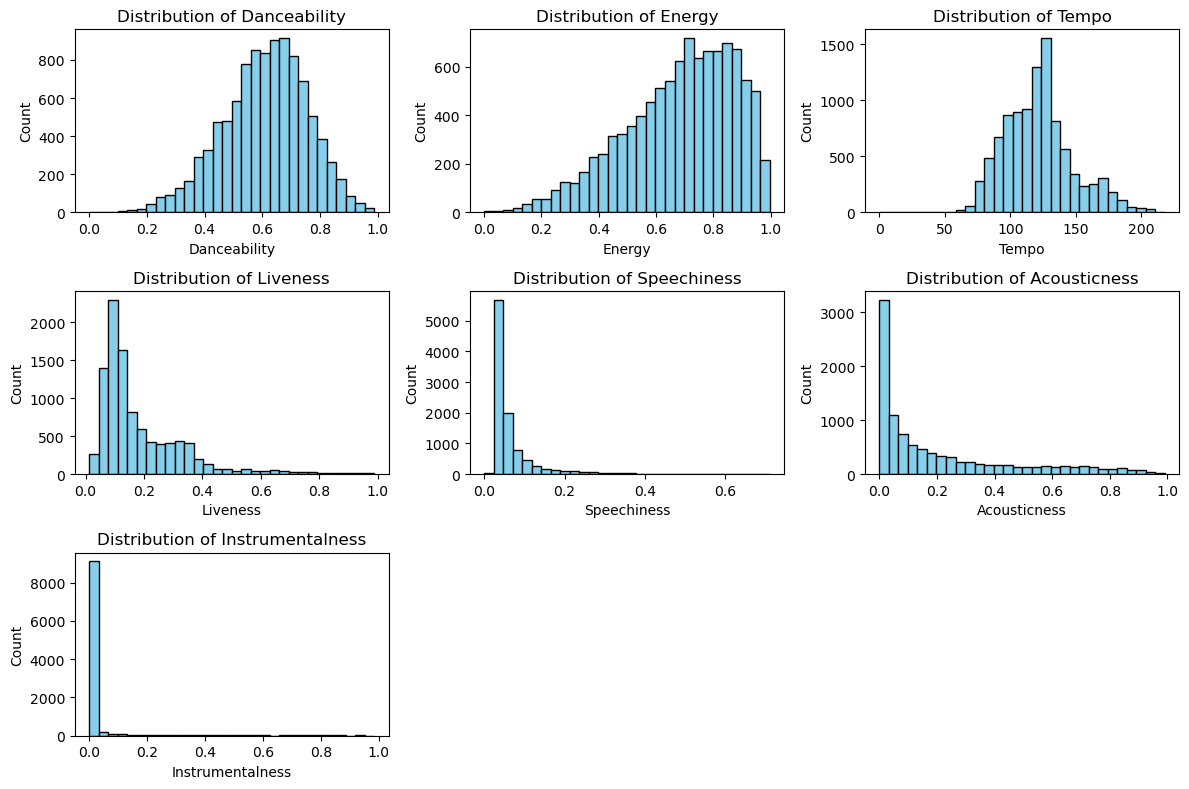

In [22]:
features = ['Danceability', 'Energy', 'Tempo', 'Liveness', 'Speechiness', 'Acousticness', 'Instrumentalness']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
#Shall be using Danceability, Energy and Tempo to make a system that recommends songs to be played after a given song.

In [26]:
df = df.drop(columns=['Album Genres', 'Artist Genres', 'Track Preview URL'])

In [34]:
song_name = input("What do you want to listen to? ")

# Strip and lower for a flexible match
song_name_cleaned = song_name.strip().lower()

df['Track Name Lower'] = df['Track Name'].str.lower().str.strip()

# Check if the song exists
if song_name_cleaned not in df['Track Name Lower'].values:
    print("Song not found in the dataset.")
else:
    song_index = df[df['Track Name Lower'] == song_name_cleaned].index[0]


What do you want to listen to?  ROXANNE


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

features = ['Danceability', 'Energy', 'Tempo']
df_clean = df.dropna(subset=features)

# Normalize or scale your data if needed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clean[features])

similarity_matrix = cosine_similarity(df_scaled)

df_clean = df_clean.reset_index(drop=True)

similar_songs = list(enumerate(similarity_matrix[song_index]))
similar_songs = sorted(similar_songs, key=lambda x: x[1], reverse=True)[1:6]


In [40]:
print("\n:")
for i, score in similar_songs:
    track = df_clean.loc[i, 'Track Name']
    artist = df_clean.loc[i, 'Artist Name(s)']  # Make sure this column exists
    print(f"{track} by {artist}")


:
One Thing by Alicia Keys
Lil Boo Thang by Paul Russell
Werewolves of London by Warren Zevon
Little L by Jamiroquai
Play That Funky Music by Wild Cherry


In [42]:
#To simulate playlist flow

In [44]:
def recommend_next_song(current_index, df, similarity_matrix, played_indices, top_n=10):
    similarities = similarity_matrix[current_index]
    similar_indices = np.argsort(similarities)[::-1]

    # Filter out already played songs and the current song
    filtered_indices = [i for i in similar_indices if i not in played_indices and i != current_index]

    if not filtered_indices:
        return None  # No new recommendation

    best_index = filtered_indices[0]
    return df.iloc[best_index]

In [46]:
song_title = input("What do you want to listen to? ")


matches = df_clean[df_clean['Track Name'].str.lower() == song_title.lower()]
if matches.empty:
    print("Song not found. Try again.")
    exit()

current_index = matches.index[0]
playlist = [current_index]


for _ in range(30): 
    next_song = recommend_next_song(playlist[-1], df_clean, similarity_matrix, playlist)

    if next_song is None:
        print("No more unique recommendations available.")
        break

    duration_ms = next_song['Track Duration (ms)']
    minutes = int(duration_ms // 60000)
    seconds = int((duration_ms % 60000) // 1000)
    duration_str = f"{minutes}:{seconds:02d}"


    next_index = df_clean.index[df_clean['Track Name'] == next_song['Track Name']].tolist()[0]
    playlist.append(next_index)
    print(f"\nNow playing: {next_song['Track Name']} by {next_song['Artist Name(s)']} {duration_str}")

What do you want to listen to?  One Dance



Now playing: All I Have to Give by Backstreet Boys 4:36

Now playing: Treasure by Bruno Mars 2:58

Now playing: Fever by Dua Lipa, Angèle 2:36

Now playing: According To My Heart by The Reels 3:12

Now playing: Aussie As by Matt Scullion 3:39

Now playing: Breaking up Is Hard to Do by The Partridge Family 2:33

Now playing: Sway by Bic Runga 4:22

Now playing: Don't Dream It's Over by Crowded House 3:56

Now playing: ROXANNE by Arizona Zervas 2:43

Now playing: Light It Up (feat. Static Revenger) by Stan Walker, Static Revenger 3:30

Now playing: Holidae In by Chingy, Ludacris, Snoop Dogg 5:14

Now playing: Circle by Marques Houston 4:05

Now playing: Drag Me Down by One Direction 3:12

Now playing: Nu Flow by Big Brovaz 3:21

Now playing: So Am I by Ava Max 3:03

Now playing: Womanizer by Britney Spears 3:44

Now playing: Me and You and a Dog Named Boo by Lobo 2:57

Now playing: Julie, Do Ya Love Me by Bobby Sherman 2:52

Now playing: Everybody On The Floor (Pump It) - Radio Edit by 